# Laboratorio 4 (Trabajo final, parte uno)

Bienvenido al tercer laboratorio del curso Análisis de Datos en Python. 

Escribe el código correspondiente para contestar cada una de las preguntas. Fíjate muy bien en el nombre de las variables, ya que de lo contrario, tu trabajo no podrá ser evaluado de manera correcta. 

Debes ir ejecutando las celdas de codigo en el orden que aparecen, para evitar tener errores. 

El laboratorio consta de dos partes: la primera, que realizarás en este jupyter notebook y la segunda, que se encuentra en el recurso llamado "Trabajo final (parte 2)"

In [37]:
## Primero importamos las librerias y los datos que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones data')
ratings = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones ratings')
users = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones users') 

OSError: [Errno 22] Invalid argument: 'Tarea 4.xlsx'

In [ ]:
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,Grupo k means
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18,1
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021-09-24,1
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,1
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021-09-24,1
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,1


In [ ]:
ratings.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [ ]:
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


In [ ]:
merged_df = pd.merge(ratings, users, on='user_id', how='inner')
merged_df = pd.merge(merged_df, data,on='cellphone_id',how='inner')
merged_df

,user_id,cellphone_id,rating,age,gender,occupation,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,Grupo k means
0,0,30,1,38,Female,Data analyst,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,2
1,16,30,2,31,Female,sales,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,2
2,25,30,5,27,Female,Team leader,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,2
3,32,30,1,39,Male,QA Software Manager,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,2
4,33,30,10,30,Female,Healthcare,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,237,2,6,33,Male,Education,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,1
986,245,2,6,35,Male,HEALTHCARE,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,1
987,251,2,7,39,Male,Computer technician,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,1
988,256,2,7,49,Male,Information Technology,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,1


### Pregunta 1

Utilice el método de agrupación “K-Means” y construya 3 agrupaciones de celulares, considerando los siguientes atributos 

`['internal memory','RAM','performance','main camera','selfie camera','battery size']`

¿Qué puede decir sobre los precios de venta de los celulares de cada grupo?

Para responder a lo anterior, construye un dataframe que contega los 3 clusters y para cada grupo obtenga el precio promedio, la desviación estandar del precio, precio mínimo y precio máximo.

**MUY IMPORTANTE**
* NO debes aproximar ni redondear ningún valor
* Utilizar la función `preprocessing.MinMaxScaler()` para estandarizar datos.
* Usa la función `KMeans` con `random_state=42`. Los datos que entregas a esta función deben estar estandarizados, según el punto anterior. 

Debes crear una tabla de la forma:


|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|1 | 1  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|2 | 2  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |

Utiliza los mismos nombres para los Headers: Grupo k means, Precio promedio, Desv est precio, Precio mínimo, Precio máximo. Es importante que respetes las mayúsculas de dichos nombres tal cual son señalados.
Debe guardarse en la variable 'data_grupos'

In [ ]:
data_grupos=None

columnas = ['internal memory','RAM','performance','main camera','selfie camera','battery size']

# Estandarizar los datos
scaler = preprocessing.MinMaxScaler()
data_escalada = scaler.fit_transform(data[columnas])

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Grupo k means'] = kmeans.fit_predict(data_escalada)

# Calcular las métricas solicitadas para cada grupo
data_grupos = data.groupby('Grupo k means')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()
data_grupos.columns = ['Grupo k means', 'Precio promedio', 'Desv est precio', 'Precio mínimo', 'Precio máximo']

# Mostrar el resultado
data_grupos

,Grupo k means,Precio promedio,Desv est precio,Precio mínimo,Precio máximo
0,0,642.571429,212.874725,312,987
1,1,903.090909,565.528683,236,1998
2,2,225.375000,122.057290,129,500


<Axes: xlabel='Grupo k means', ylabel='price'>

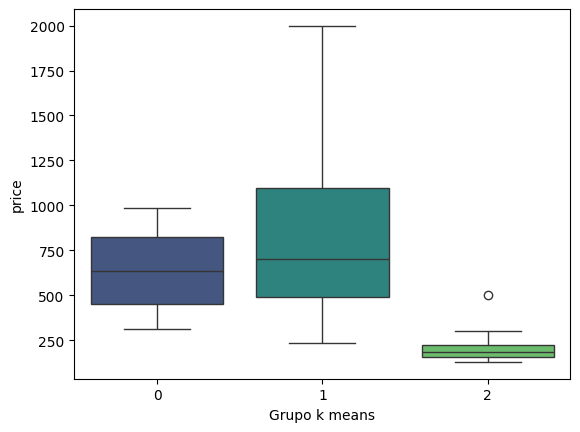

In [ ]:
sns.boxplot(data=data, x='Grupo k means', y='price', palette='viridis')

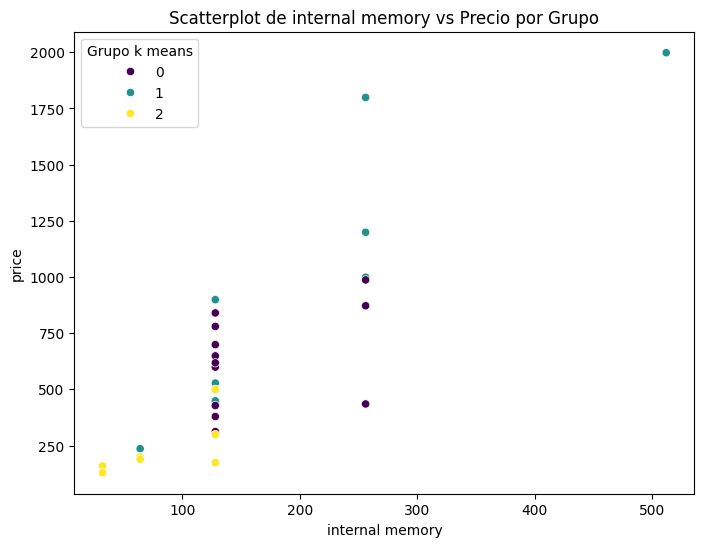

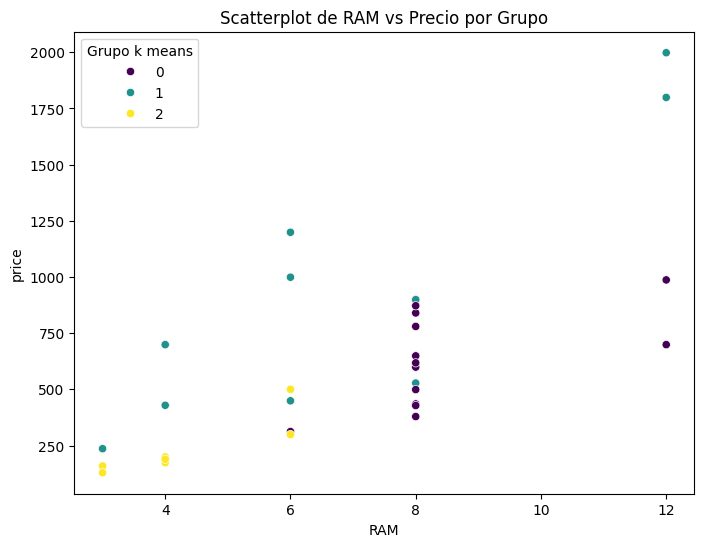

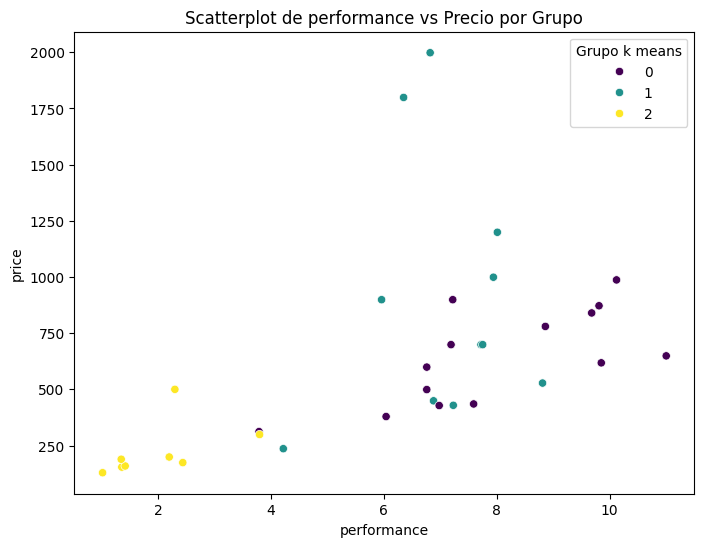

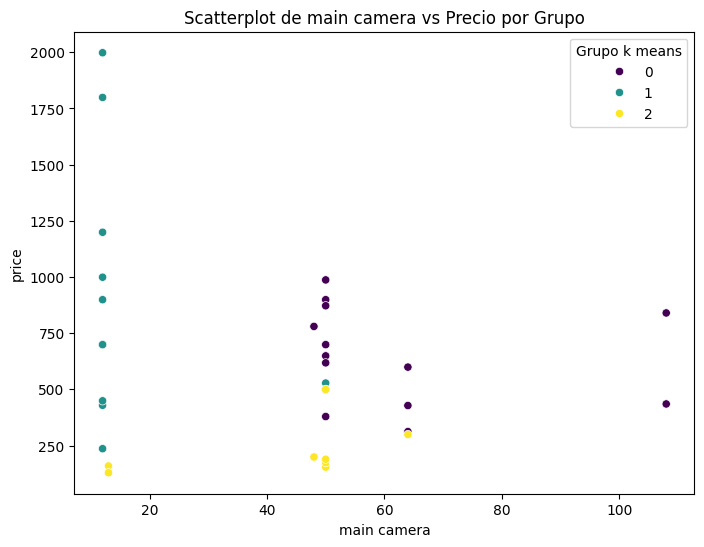

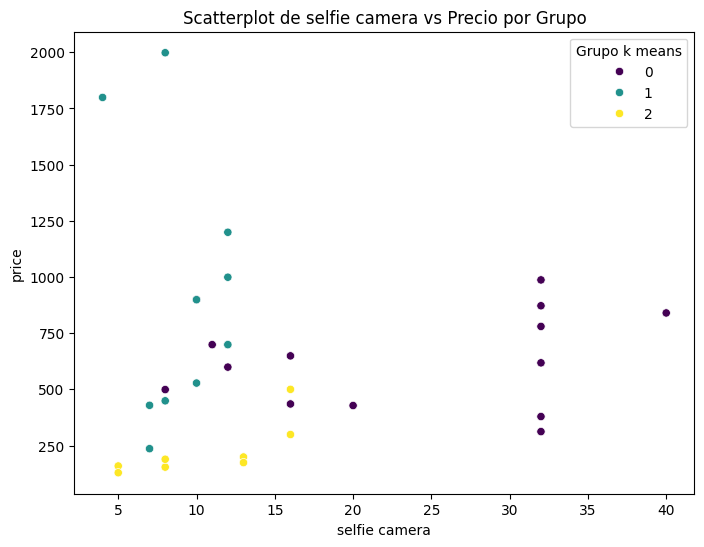

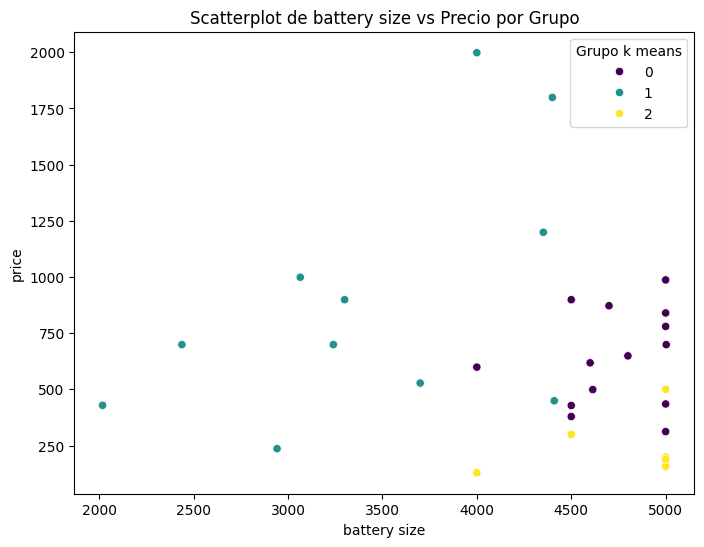

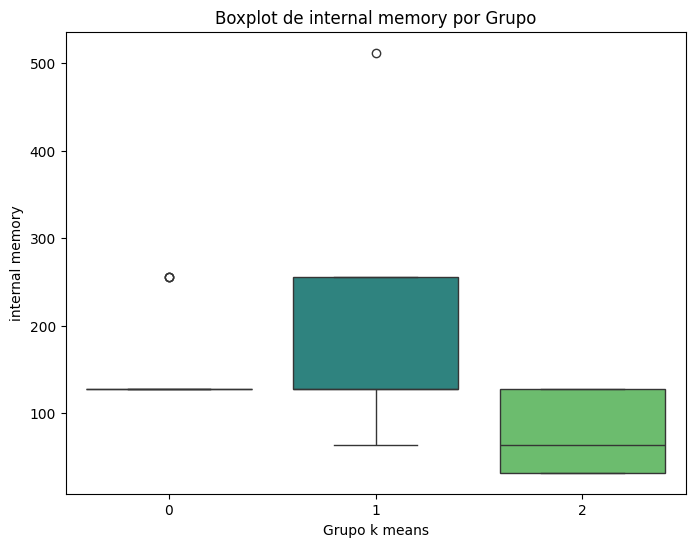

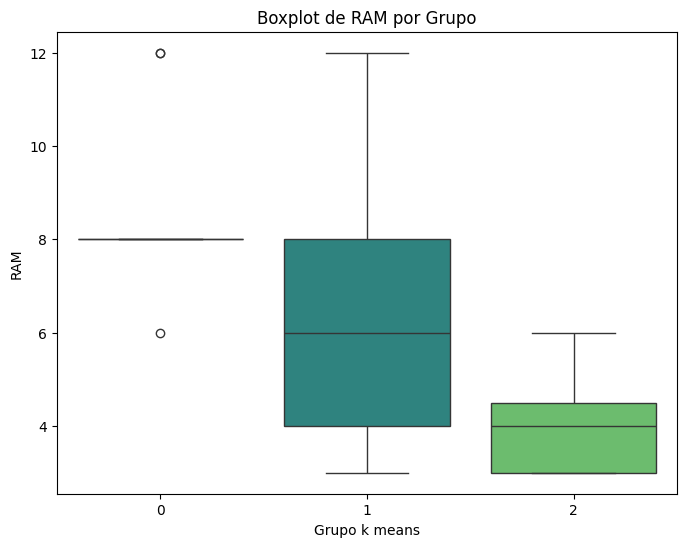

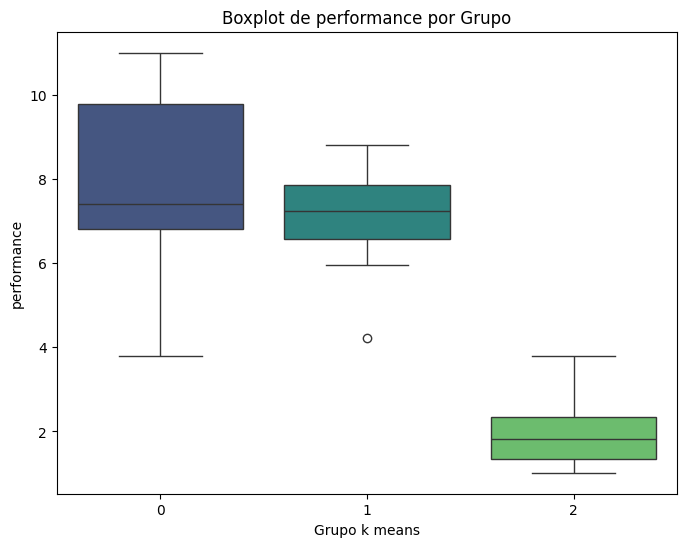

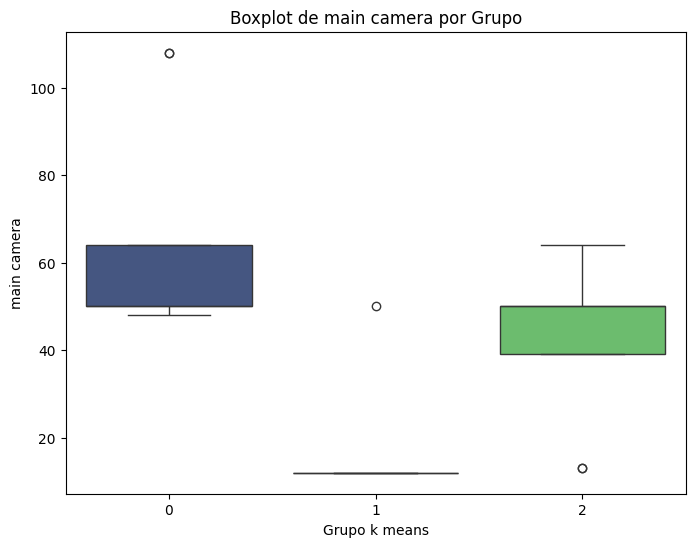

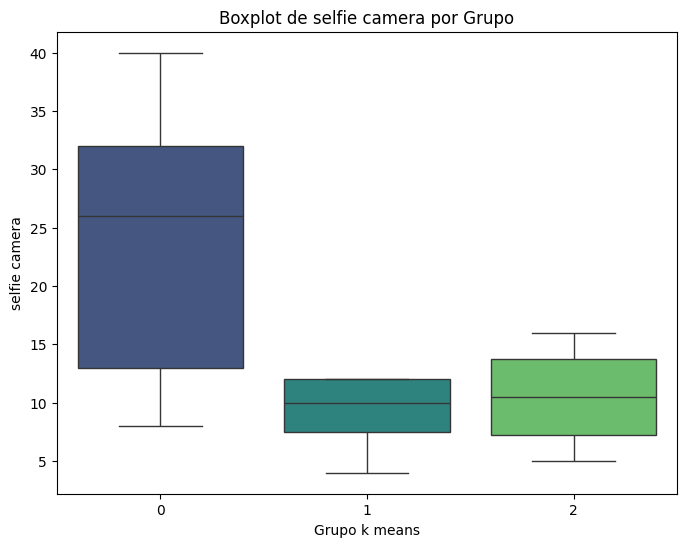

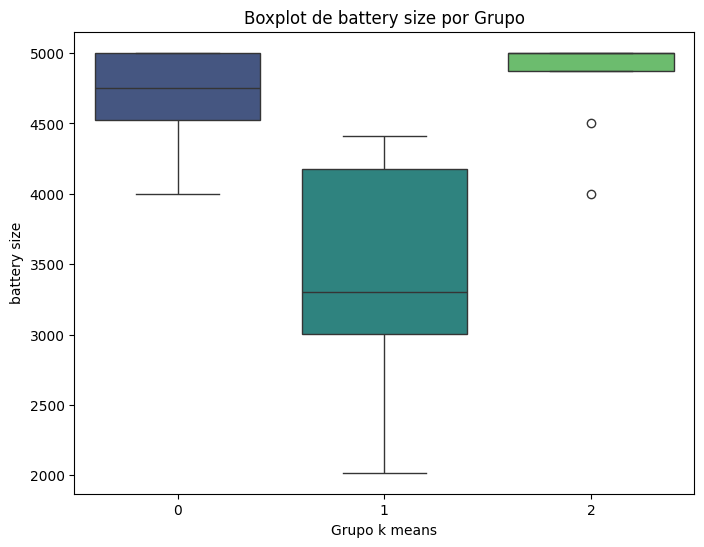

In [ ]:
for columna in columnas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=columna, y='price', hue='Grupo k means', palette='viridis')
    plt.title(f'Scatterplot de {columna} vs Precio por Grupo')
    plt.show()

# Boxplot para cada variable en relación con el grupo
for columna in columnas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Grupo k means', y=columna, palette='viridis')
    plt.title(f'Boxplot de {columna} por Grupo')
    plt.show()



Haremos un test visible para ver si estamos por buen camino, usaremos de ejemplo el primer grupo (Grupo 0). Tu tabla debe comenzar de la siguiente forma:

|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | 225.375000 |  122.057290  |  129  |  500  |


In [38]:
# Revisión del primer cluster 
data_cluster_0 = data_grupos[data_grupos["Grupo k means"] == 0]

assert np.round(data_cluster_0["Precio promedio"].values,1) == 225.4, "Promedio del cluster 0 con errores"
assert np.round(data_cluster_0["Desv est precio"].values, 1) == 122.1, "Desviación estandar del cluster 0 con errores"

assert np.round(data_cluster_0["Precio mínimo"].values, 1) == 129.0, "Mínimo del cluster 0 con errores"
assert np.round(data_cluster_0["Precio máximo"].values, 1) == 500, "Máximo del cluster 0 con errores"


AssertionError: Promedio del cluster 0 con errores

Ahora haremos el test real, no debes modificar ni escribir nada en la siguiente celda, solo debes ejecutarla.

### Pregunta 2
Calcule la correlación (bivariada) entre el precio y todas las variables cuantitativas con información sobre los celulares. ¿Cuáles son las 3 variables que presentan una mayor correlación con el precio?
Para responder a la pregunta, debes completar las variables variable_1, variable_2 y variable_3 con las 3 variables que poseen mayor correlacion, siendo variable_1 la que mayor correlación posee, variable_2, la segunda mayor y variable_3 la tercera mayor.

Ejemplo: si la variable 'main camera' fuera la variable con mayor correlación. Entonces deben dejar
variable_1 = 'main camera', si la segunda mayor fuera 'RAM' entonces variable_2 = 'RAM' (deben respetar el nombre con sus espacios y mayúsculas)

NOTA: Deben generar las correlaciones de la forma que más cómodos se sientan, no tendrán puntaje aquellos que completan las variables sin entregar un respaldo con las correlaciones calculadas.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cellphone_id      33 non-null     int64         
 1   brand             33 non-null     object        
 2   model             33 non-null     object        
 3   operating system  33 non-null     object        
 4   internal memory   33 non-null     int64         
 5   RAM               33 non-null     int64         
 6   performance       33 non-null     float64       
 7   main camera       33 non-null     int64         
 8   selfie camera     33 non-null     int64         
 9   battery size      33 non-null     int64         
 10  screen size       33 non-null     float64       
 11  weight            33 non-null     int64         
 12  price             33 non-null     int64         
 13  release date      33 non-null     datetime64[ns]
 14  Grupo k means     33 non-nul

In [ ]:
variable_1=None
variable_2=None
variable_3=None

# your code here
columnas2 = ['internal memory','RAM','performance','main camera','selfie camera','battery size','screen size','weight']

# Calcular la correlación entre el precio y todas las variables cuantitativas
correlations = data[columnas2].corrwith(data['price']).abs()

# Seleccionar las tres variables con mayor correlación
variables_correlacionadas = correlations.sort_values(ascending=False).index[:3]

# Asignar las variables a las respuestas
variable_1, variable_2, variable_3 = variables_correlacionadas

# Mostrar el resultado
variable_1, variable_2, variable_3


('internal memory', 'RAM', 'weight')

In [ ]:
correlations

internal memory    0.834266
RAM                0.706235
performance        0.527611
main camera        0.255498
selfie camera      0.023828
battery size       0.134425
screen size        0.316986
weight             0.546797
dtype: float64

Revisemos que los nombres de las variables hayan sido bien escritos, 

In [ ]:
for v in [variable_1, variable_2, variable_3]:
    print(v in data.columns)

True
True
True


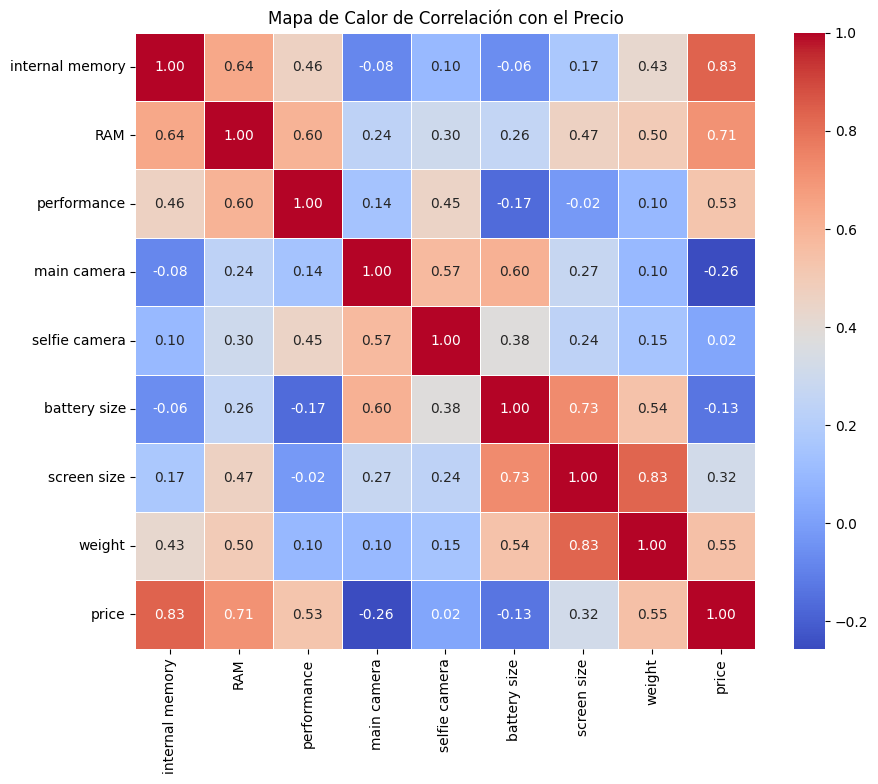

In [41]:
# Seleccionar las columnas cuantitativas para el heatmap
columnas_heatmap = ['internal memory', 'RAM', 'performance', 'main camera', 'selfie camera', 'battery size', 'screen size', 'weight', 'price']

# Crear una matriz de correlación
correlations_matrix = data[columnas_heatmap].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir un título
plt.title('Mapa de Calor de Correlación con el Precio')

# Mostrar el heatmap
plt.show()

In [42]:
correlations_matrix

,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price
internal memory,1.000000,0.641503,0.464525,-0.080676,0.100388,-0.060276,0.170863,0.425385,0.834266
RAM,0.641503,1.000000,0.600343,0.238389,0.301394,0.257333,0.465346,0.498600,0.706235
performance,0.464525,0.600343,1.000000,0.143480,0.448719,-0.165915,-0.022065,0.096966,0.527611
main camera,-0.080676,0.238389,0.143480,1.000000,0.572440,0.603202,0.272344,0.098036,-0.255498
selfie camera,0.100388,0.301394,0.448719,0.572440,1.000000,0.377646,0.239336,0.149448,0.023828
battery size,-0.060276,0.257333,-0.165915,0.603202,0.377646,1.000000,0.727780,0.537801,-0.134425
screen size,0.170863,0.465346,-0.022065,0.272344,0.239336,0.727780,1.000000,0.832264,0.316986
weight,0.425385,0.498600,0.096966,0.098036,0.149448,0.537801,0.832264,1.000000,0.546797
price,0.834266,0.706235,0.527611,-0.255498,0.023828,-0.134425,0.316986,0.546797,1.000000


Forma de la recta:
Y = 688.38 + 247.84*internal memory + 126.66*RAM + 81.47*weight


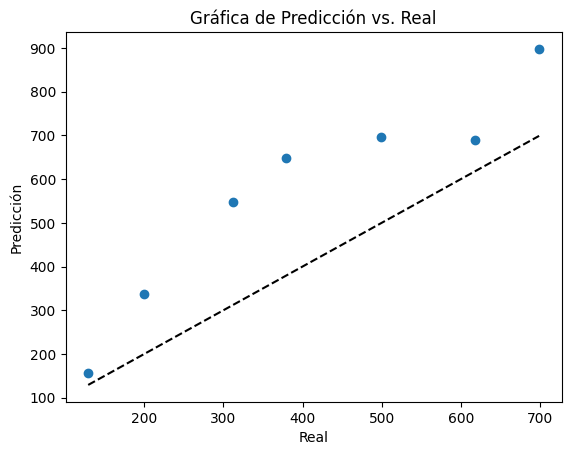

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las variables para la regresión
variables_regresion = [variable_1, variable_2, variable_3]

# Separar las variables independientes (X) y la variable dependiente (y)
X = data[variables_regresion].values
y = data['price'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train_scaled, y_train)

# Obtener los coeficientes y el intercepto
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_

# Forma de la recta
recta = f"Y = {intercepto:.2f} + {coeficientes[0]:.2f}*{variable_1} + {coeficientes[1]:.2f}*{variable_2} + {coeficientes[2]:.2f}*{variable_3}"

# Imprimir la forma de la recta
print("Forma de la recta:")
print(recta)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test_scaled)

# Visualizar la gráfica de predicción vs. real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Gráfica de Predicción vs. Real')
plt.show()


### Pregunta 3
Construya una regresión multivariada entre precio y las 3 variables determinadas en la parte (2). Utilice un 20% de los datos para testear y un random_state de 42. El entorno de este jupyter notebook permite el LinearRegression(normalize=True), así que úsenlo.
Una vez construido su modelo, debe almacenar la siguiente información:

    'coeficientes': para esto utilicen el comando .coef_ (nombredesumodelo.coef_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'intercepto': para esto utilicen el comando .intercept_ (nombredesumodelo.intercept_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'r2_score_final': también sin redondear ni aproximar nada.
    
Adicionalmente, genera una gráfica que contraste los valores reales con la predicción.


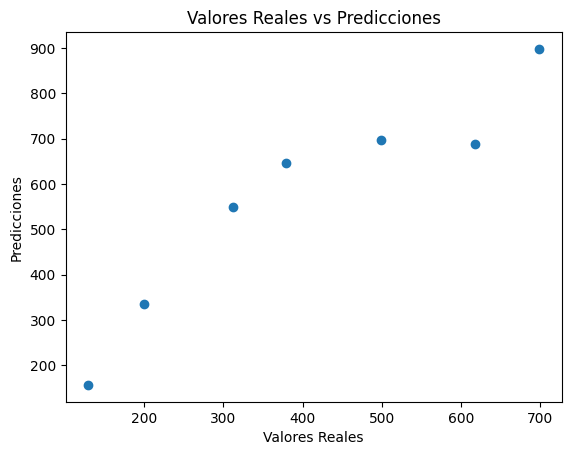

In [45]:
coeficientes=None
intercepto=None
r2_score_final=None

# your code here
# Seleccionar las variables para la regresión
variables_regresion = [variable_1, variable_2, variable_3]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[variables_regresion], data['price'], test_size=0.2, random_state=42)

# Construir el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Almacenar la información solicitada
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_
y_pred = modelo_regresion.predict(X_test)
r2_score_final = r2_score(y_test, y_pred)

# Mostrar la información
coeficientes, intercepto, r2_score_final

# Generar la gráfica de valores reales vs predicción
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

### Pregunta 4
Construya una agrupación, utilizando K-Means, considerando ranking promedio (puesto por el comprador), edad y sexo. Escoja, con el método del codo, la cantidad de grupos. ¿Qué puede decir de las similitudes o diferencias intra e inter grupos?
Utilice el min_max_scaler para la estandarización de los datos y utilice un random_state de 42 en la creación de Kmeans.
Hint: para el método del códogo, haga un range hasta 15.

Para responder esta pregunta, complete la variable 'clusters' con el número de clusters que obtenga mediante el método del codo, si su resultado es 10, entonces 'clusters'=10. (como int).
Elija el segundo codo, el primero será muy notorio y evitende, pero el segundo será la opción correcta.

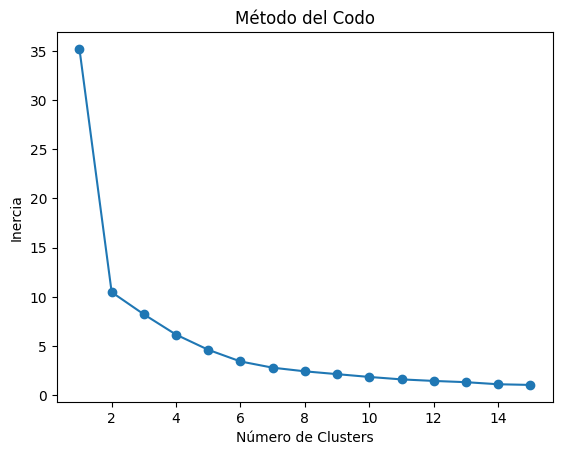

,rating,age,gender_Male
Grupo_Kmeans,,,
0,5.536364,42.363636,1.0
1,6.503448,30.586207,0.0
2,7.546667,30.533333,1.0
3,7.027778,48.222222,0.0


In [46]:
#En esta primera parte, calcule los clusters mediante el método del codo.
clusters=None

# Crear el DataFrame 'ratings'
merged_df = pd.merge(ratings, users, on='user_id', how='inner')
merged_df = pd.merge(merged_df, data,on='cellphone_id',how='inner')
data_p4 = merged_df

# Calcular el promedio de los rankings por usuario
average_ranking = data_p4.groupby('user_id')['rating'].mean().reset_index()

# Combinar la información de 'average_ranking' con 'users' por 'user_id'
users_with_ranking = pd.merge(users, average_ranking, on='user_id', how='inner')
# Codificar la variable categórica 'gender' utilizando one-hot encoding
users_with_ranking = pd.get_dummies(users_with_ranking, columns=['gender'], drop_first=True)

# Seleccionar las variables para la agrupación
variables_agrupacion = ['rating', 'age', 'gender_Male']

# Estandarizar los datos
scaler = MinMaxScaler()
data_agrupacion_scaled = scaler.fit_transform(users_with_ranking[variables_agrupacion])

# Inicializar una lista para almacenar las inercias (suma de distancias al cuadrado)
inercias = []

# Probar diferentes números de clusters (de 1 a 15)
for n_clusters in range(1, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_agrupacion_scaled)
    inercias.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 16), inercias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Seleccionar el segundo codo (punto de inflexión)
clusters = 4  #Completa con el número de clusters correspondiente al segundo codo

# Construir el modelo de K-Means con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=clusters, random_state=42)
users_with_ranking['Grupo_Kmeans'] = kmeans_final.fit_predict(data_agrupacion_scaled)

# Analizar las similitudes o diferencias intra e inter grupos según las variables originales
analisis_grupo = users_with_ranking.groupby('Grupo_Kmeans')[variables_agrupacion].mean()
analisis_grupo

In [47]:
# Revisemos que la variable haya quedado correctamente asignada a tu respuesta, 
print(clusters)

4


Ahora se procederá a evaluar los clusters obtenidos, no modifique ni altere la celda que está acontinuación, solo debe ejecutarla.

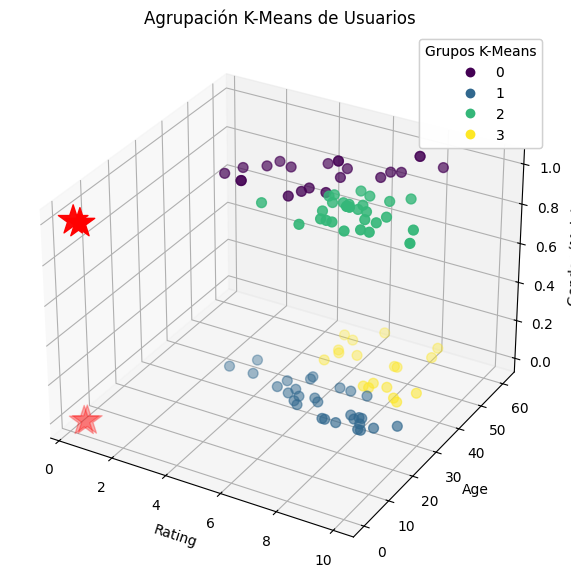

In [48]:
# Crear el DataFrame 'ratings'
merged_df = pd.merge(ratings, users, on='user_id', how='inner')
merged_df = pd.merge(merged_df, data, on='cellphone_id', how='inner')
data_p4 = merged_df

# Calcular el promedio de los rankings por usuario
average_ranking = data_p4.groupby('user_id')['rating'].mean().reset_index()

# Combinar la información de 'average_ranking' con 'users' por 'user_id'
users_with_ranking = pd.merge(users, average_ranking, on='user_id', how='inner')
# Codificar la variable categórica 'gender' utilizando one-hot encoding
users_with_ranking = pd.get_dummies(users_with_ranking, columns=['gender'], drop_first=True)

# Seleccionar las variables para la agrupación
variables_agrupacion = ['rating', 'age', 'gender_Male']

# Estandarizar los datos
scaler = MinMaxScaler()
data_agrupacion_scaled = scaler.fit_transform(users_with_ranking[variables_agrupacion])

# Construir el modelo de K-Means con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=clusters, random_state=42)
users_with_ranking['Grupo_Kmeans'] = kmeans_final.fit_predict(data_agrupacion_scaled)

# Graficar la agrupación en 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot para los puntos de datos
scatter = ax.scatter(users_with_ranking['rating'], users_with_ranking['age'], users_with_ranking['gender_Male'], c=users_with_ranking['Grupo_Kmeans'], cmap='viridis', s=50)

# Scatter plot para los centroides
centroids = kmeans_final.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='red', s=500)

# Configurar etiquetas de ejes
ax.set_xlabel('Rating')
ax.set_ylabel('Age')
ax.set_zlabel('Gender (Male)')

# Añadir leyenda
legend1 = ax.legend(*scatter.legend_elements(), title='Grupos K-Means')
ax.add_artist(legend1)

# Añadir título
plt.title('Agrupación K-Means de Usuarios')

# Mostrar la gráfica
plt.show()


Ahora debe aplicar el método de kmeans con el número de clusters obtenido y graficarlos.
Ruerde utilizar la semilla de random_state=42

In [ ]:
kmeans_p4 = KMeans(n_clusters=4, random_state=42).fit(df_escalado_p4)
centroids_p4 = kmeans_p4.cluster_centers_
centroids_p4

labels_p4 = kmeans_p4.predict(df_escalado_p4)
data_p4['label'] = labels_p4
data_p4['cellphone_id'] = id_cell

x = df_escalado_p4['rating'].values
y = df_escalado_p4['age'].values
z = df_escalado_p4['gender'].values

colores=['red','green','blue','orange']
asignar=[]
for row in labels_p4:
     asignar.append(colores[row])     
plt.rcParams["figure.figsize"] = (12,7)
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=asignar)
ax.scatter3D(centroids_p4[:, 0], centroids_p4[:, 1],centroids_p4[:, 2], marker = '*',c=['red','green','blue','orange'], 
            s=900)
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("Gender")
plt.title('Agrupación k-means puesto por el comprador')
plt.show()

Una vez desarrollado los clusters mediante Kmeans ¿Qué puede decir de las similitudes o diferencias intra e inter grupos? Son al menos 1 diferencia y 1 similitud para el caso intra-grupo y tambien para el caso inter-grupos

Una vez que has desarrollado los clusters mediante K-Means, puedes analizar las similitudes y diferencias intra e inter grupos utilizando las variables utilizadas para la agrupación. En este caso, las variables son 'rating' (puntuación promedio), 'age' (edad) y 'gender_Male' (indicador de género masculino).

Similitudes Intra-Grupo:
Similitud en Puntuación Promedio (Rating):
Intra-Grupo: Dentro de cada grupo, es probable que observes una similitud en las puntuaciones promedio de los usuarios. Los usuarios dentro de un mismo grupo tienden a calificar los celulares de manera similar.
Diferencias Intra-Grupo:
Diferencia en Edades (Age):
Intra-Grupo: Aunque los usuarios dentro de un grupo pueden tener puntuaciones de rating similares, podrían tener diferencias en la edad. Por ejemplo, un grupo podría tener usuarios más jóvenes y otro más mayores, lo que indica que la agrupación no se basa únicamente en la edad.
Similitudes Inter-Grupos:
Similitud en Género (Gender_Male):
Inter-Grupos: Puedes observar similitudes en términos de género entre algunos grupos. Por ejemplo, es posible que un grupo tienda a tener más usuarios masculinos en comparación con otro grupo.
Diferencias Inter-Grupos:
Diferencia en Puntuaciones Promedio (Rating):
Inter-Grupos: Entre los grupos, es probable que observes diferencias en las puntuaciones promedio. Un grupo podría calificar los celulares más positivamente en comparación con otro grupo.
Recuerda que estas observaciones son generales y podrían variar según la naturaleza específica de tus datos. Es importante realizar un análisis detallado de cada grupo y sus características para obtener una comprensión más completa de las similitudes y diferencias.


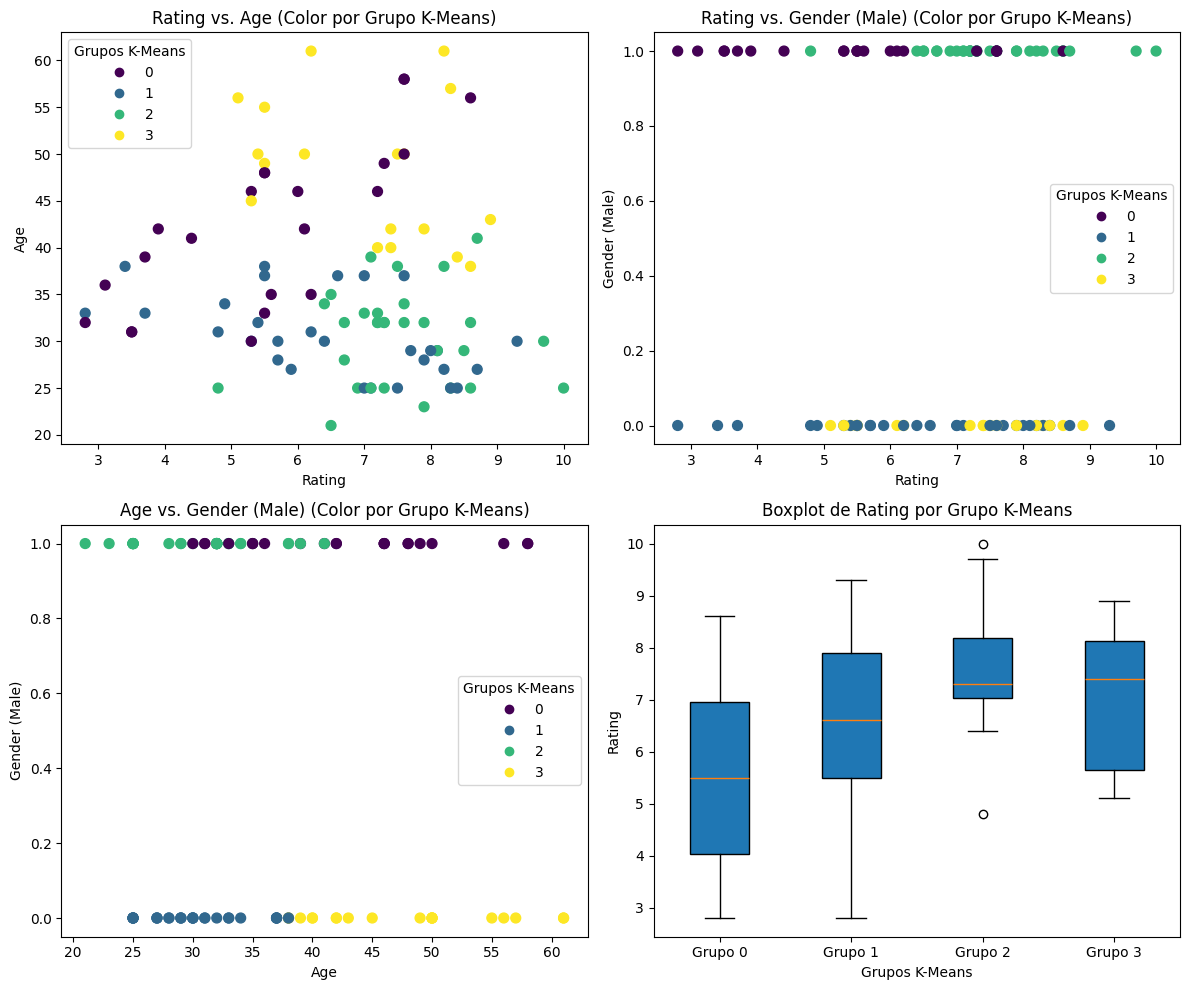

In [49]:
# Visualizar los grupos y analizar similitudes/diferencias
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot para 'rating' vs. 'age' con colores por grupo
scatter = axes[0, 0].scatter(users_with_ranking['rating'], users_with_ranking['age'], c=users_with_ranking['Grupo_Kmeans'], cmap='viridis', s=50)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Age')
axes[0, 0].set_title('Rating vs. Age (Color por Grupo K-Means)')
axes[0, 0].legend(*scatter.legend_elements(), title='Grupos K-Means')

# Scatter plot para 'rating' vs. 'gender_Male' con colores por grupo
scatter = axes[0, 1].scatter(users_with_ranking['rating'], users_with_ranking['gender_Male'], c=users_with_ranking['Grupo_Kmeans'], cmap='viridis', s=50)
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Gender (Male)')
axes[0, 1].set_title('Rating vs. Gender (Male) (Color por Grupo K-Means)')
axes[0, 1].legend(*scatter.legend_elements(), title='Grupos K-Means')

# Scatter plot para 'age' vs. 'gender_Male' con colores por grupo
scatter = axes[1, 0].scatter(users_with_ranking['age'], users_with_ranking['gender_Male'], c=users_with_ranking['Grupo_Kmeans'], cmap='viridis', s=50)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Gender (Male)')
axes[1, 0].set_title('Age vs. Gender (Male) (Color por Grupo K-Means)')
axes[1, 0].legend(*scatter.legend_elements(), title='Grupos K-Means')

# Boxplot para 'rating' con colores por grupo
boxplot = axes[1, 1].boxplot([users_with_ranking[users_with_ranking['Grupo_Kmeans'] == i]['rating'] for i in range(clusters)], patch_artist=True)
axes[1, 1].set_xticklabels([f'Grupo {i}' for i in range(clusters)])
axes[1, 1].set_xlabel('Grupos K-Means')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_title('Boxplot de Rating por Grupo K-Means')

# Ajustar diseño
plt.tight_layout()
plt.show()


In [53]:
# Crear una tabla resumen con estadísticas descriptivas por grupo
resumen_grupo = users_with_ranking.groupby('Grupo_Kmeans')[['rating', 'age', 'gender_Male']].describe()

# Renombrar las columnas para mayor claridad
resumen_grupo.columns = [f'{var}_{stat}' for var, stat in zip(resumen_grupo.columns.get_level_values(1), resumen_grupo.columns.get_level_values(0))]

# Mostrar la tabla resumen
print(resumen_grupo)



              count_rating  mean_rating  std_rating  min_rating  25%_rating  \
Grupo_Kmeans                                                                  
0                     22.0     5.536364    1.664631         2.8       4.025   
1                     29.0     6.503448    1.654967         2.8       5.500   
2                     30.0     7.546667    1.030813         4.8       7.025   
3                     18.0     7.027778    1.284205         5.1       5.650   

              50%_rating  75%_rating  max_rating  count_age   mean_age  \
Grupo_Kmeans                                                             
0                    5.5       6.950         8.6       22.0  42.363636   
1                    6.6       7.900         9.3       29.0  30.586207   
2                    7.3       8.175        10.0       30.0  30.533333   
3                    7.4       8.125         8.9       18.0  48.222222   

               std_age  min_age  25%_age  50%_age  75%_age  max_age  
Grupo_Kmea